/tmp/ipykernel_3157545/491809005.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_df, x='Emotion', y='Count', palette='viridis')


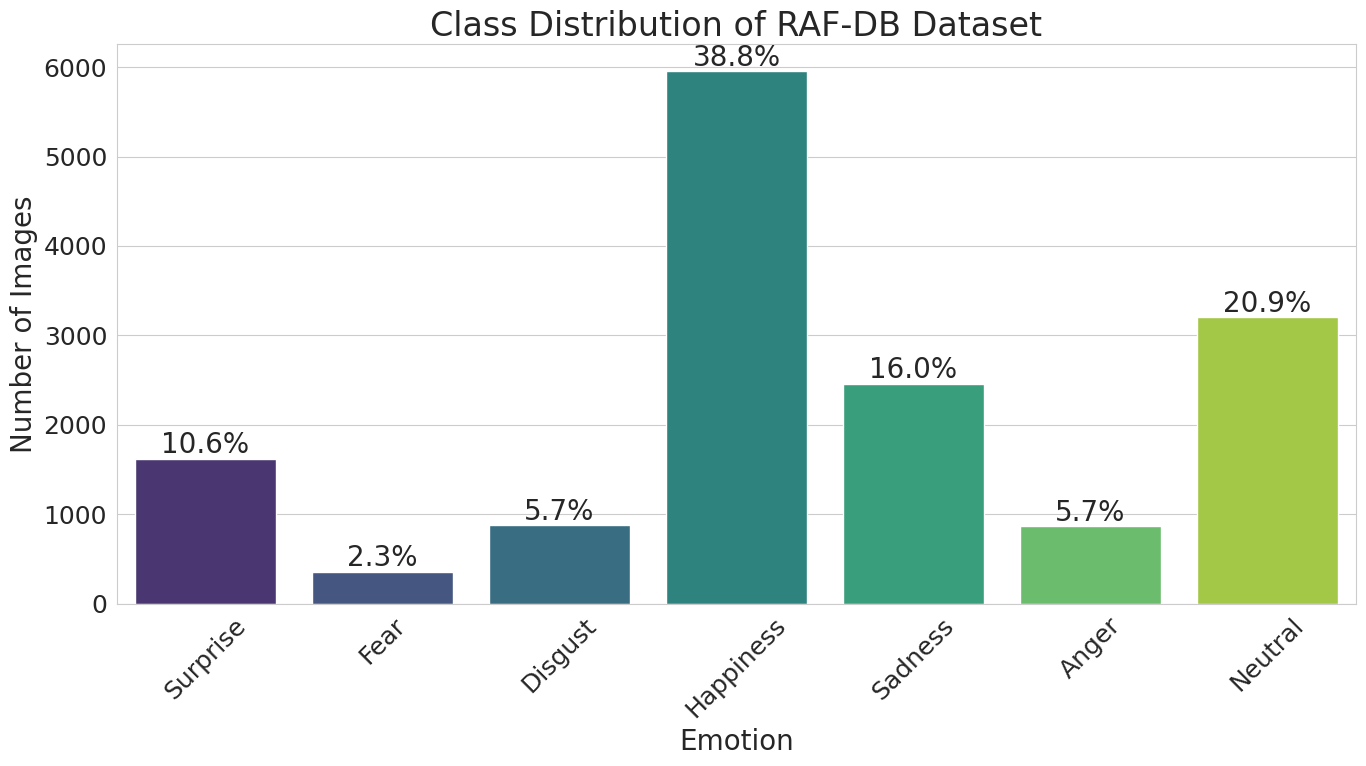

Combined Dataset Distribution:
  Surprise: 1619
  Fear: 355
  Disgust: 877
  Happiness: 5957
  Sadness: 2460
  Anger: 867
  Neutral: 3204

Plot saved to rafdb_combined_distribution.png


In [8]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Define the class labels as specified in the RAF-DB dataset documentation
class_labels = {1: 'Surprise', 2: 'Fear', 3: 'Disgust', 4: 'Happiness', 5: 'Sadness', 6: 'Anger', 7: 'Neutral'}

# Define paths to the dataset directories
base_dir = '../datasets/raf-db-dataset/DATASET'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

def get_class_distribution(directory):
    """Counts the number of images in each class subdirectory."""
    distribution = {}
    if not os.path.isdir(directory):
        print(f"Directory not found: {directory}")
        return distribution

    for class_label in os.listdir(directory):
        class_path = os.path.join(directory, class_label)
        if os.path.isdir(class_path) and class_label.isdigit():
            num_images = len(os.listdir(class_path))
            distribution[int(class_label)] = num_images
    return distribution

# Get the distributions
train_distribution = get_class_distribution(train_dir)
test_distribution = get_class_distribution(test_dir)

# Combine the distributions
combined_distribution = Counter(train_distribution) + Counter(test_distribution)

# Convert to a more readable format with actual emotion names
total_dist_named = {class_labels[k]: v for k, v in sorted(combined_distribution.items())}

# Create a DataFrame for plotting
total_df = pd.DataFrame(list(total_dist_named.items()), columns=['Emotion', 'Count'])

# --- Plotting with increased font size and modern font ---
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Set a clean sans-serif font and increase base font size
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 18})

ax = sns.barplot(data=total_df, x='Emotion', y='Count', palette='viridis')

# --- Add percentages on top of bars ---
total = total_df['Count'].sum()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 60  # Adjust the offset for better visibility
    ax.annotate(percentage, (x, y), fontsize=20, ha='center')

# Set title and labels with larger font sizes
ax.set_title('Class Distribution of RAF-DB Dataset', fontsize=24)
ax.set_xlabel('Emotion', fontsize=20)
ax.set_ylabel('Number of Images', fontsize=20)

# Set tick label sizes
ax.tick_params(axis='x', labelsize=18, rotation=45)
ax.tick_params(axis='y', labelsize=18)

plt.tight_layout()

# Save the plot to a file and display it
output_plot_path = 'rafdb_combined_distribution.png'
plt.savefig(output_plot_path)
plt.show()

# Print the combined distribution
print('Combined Dataset Distribution:')
for emotion, count in total_dist_named.items():
    print(f'  {emotion}: {count}')

print(f"\nPlot saved to {output_plot_path}")
